# Testing Colours

In [10]:
import sys; sys.path.insert(0, '..')
import matplotlib as mpl
from dot_plots import *
import Merge_Cartesian as MC


%matplotlib widget
plt.rcParams["figure.figsize"] = (5.5, 5.5)

In [11]:
L_Time = '2'
C_Time = '3'

L_impedance = '10'
C_impedance = '1'

number_periods = '3'

                 #  IMPEDANCE     ,TIME    ,LENGTH
Inductor_List =    [L_impedance   ,L_Time  ,'1']
Capacitor_List =   [C_impedance   ,C_Time  ,'1']
              #   VOLTAGE  , PERIODS       , BUCK , LOAD
Circuit_List =   ['1'      , number_periods, False, '12']


(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        10
Inductor Capacitance Per Length :       0.1
Inductor Length :                       1
Inductor Total Inductance :             10
Inductor Total Capacitance :            0.1
Inductor Velocity :                     1
Inductor Time Delay :                   1
Inductor Impedance :                    10

- The Capacitor -
Capacitor Inductance Per Length :       1.5
Capacitor Capacitance Per Length :      1.5
Capacitor Length :                      1
Capacitor Total Inductance :            1.5
Capacitor Total Capacitance :           1.5
Capacitor Velocity :                    0.6666666666666666666666666667
Capacitor Time Delay :                  1.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        3
Simulation Stop Time :                  73.00401616752981884909820438
Number of Wavefronts :                  2964
Number of Layers :                    

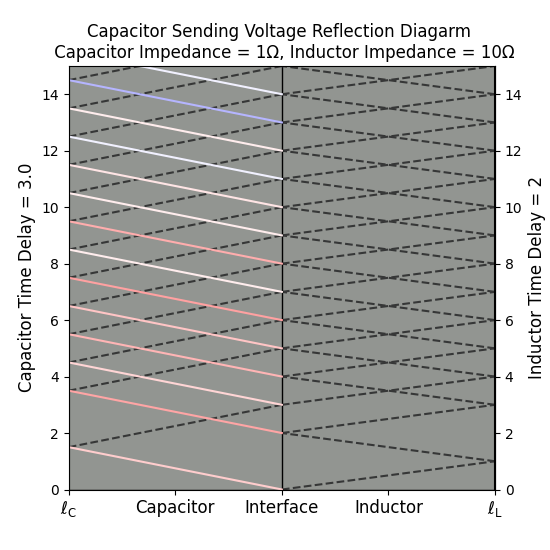

In [12]:
fig_reflection, ax_reflection = plt.subplots()

ax_reflection.set_facecolor('xkcd:grey')
ax_reflection.set_xlim([-1,1])
ax_reflection.set_xticks([-1,-0.5,0,0.5,1])
ax_reflection.set_xticklabels(["$\mathregular{\ell_C}$","Capacitor","Interface","Inductor","$\mathregular{\ell_L}$"],fontsize='large')
MC.plot_refelction_diagram_one_tx_s_or_r(data_input,data_output_ordered,True,True,False,15,ax_reflection,False)
# MC.plot_refelction_diagram_one_tx_s_and_r(data_input,data_output_ordered,True,True,15,ax_reflection,False)

In [13]:


x = np.linspace(0,10,10)
y = 5*x
interval = 2

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=50)
SM = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

cmap(norm(55))

(1.0, 0.0, 1.0, 1.0)

[Text(1, -4, '$\\mathregular{-2i_o}$'),
 Text(1, -2, '$\\mathregular{-i_o}$'),
 Text(1, 0, '0 A'),
 Text(1, 2, '$\\mathregular{i_o}$'),
 Text(1, 4, '$\\mathregular{2i_o}$')]

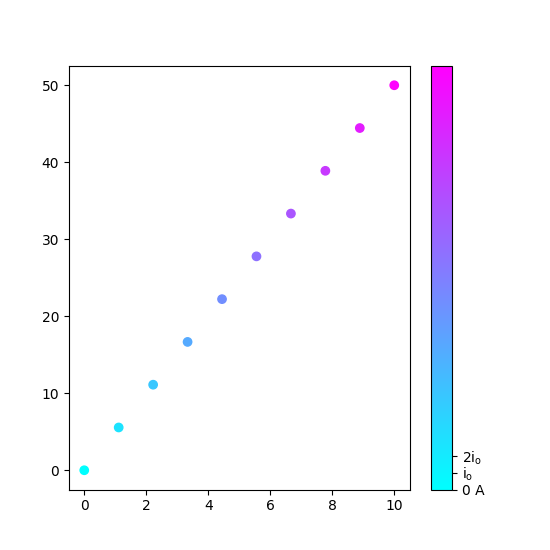

In [14]:
fig, ax = plt.subplots()

plot_ax = ax.scatter(x,y,c=y,cmap=cmap,norm=norm)
cbar = fig.colorbar(plot_ax, ticks=[-2*interval,-interval, 0, interval,2*interval])
cbar.ax.set_yticklabels(['$\mathregular{-2i_o}$','$\mathregular{-i_o}$', '0 A', '$\mathregular{i_o}$','$\mathregular{2i_o}$'])


In [15]:
Vc = np.cumsum(data_output_ordered.Voltage_Interconnect_Capacitor)
T = data_output_ordered.Time